### Team 10
### Team Members: Yuvateja Pothagunta (1002173357), Ramya Sai Donkeshwaram (1002164699)

### Final Project Code 5302

In [7]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_excel("Sales-2_updated.xlsx",sheet_name='Sales')
df.head()

CustID  AgentBonus   Age  CustTenure              Channel      Occupation  \
0  7000000        4409  22.0         4.0                Agent        Salaried   
1  7000001        2214  11.0         2.0  Third Party Partner        Salaried   
2  7000002        4273  26.0         4.0                Agent     Free Lancer   
3  7000003        1791  11.0         NaN  Third Party Partner        Salaried   
4  7000004        2955   6.0         NaN                Agent  Small Business   

  EducationField   Gender  ExistingProdType Designation  NumberOfPolicy  \
0       Graduate   Female                 3     Manager             2.0   
1       Graduate     Male                 4     Manager             4.0   
2  Post Graduate     Male                 4         Exe             3.0   
3       Graduate  Fe male                 3   Executive             3.0   
4             UG     Male                 3   Executive             4.0   

  MaritalStatus  MonthlyIncome  Complaint  ExistingPolicyTenure  SumAssured  \
0        Single        20993.0          1                   2.0    806761.0   
1      Divorced        20130.0          0                   3.0    294502.0   
2     Unmarried        17090.0          1                   2.0         NaN   
3      Divorced        17909.0          1                   2.0    268635.0   
4      Divorced        18468.0          0                   4.0    366405.0   

    Zone PaymentMethod  LastMonthCalls  CustCareScore  
0  North   Half Yearly               5            2.0  
1  North        Yearly               7            3.0  
2  North        Yearly               0            3.0  
3   West   Half Yearly               0            5.0  
4   West   Half Yearly               2            5.0

In [9]:
df.iloc[:,14:].head().to_csv('head.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [11]:
df.shape

(4520, 20)

In [12]:
df['CustID'] = df['CustID'].astype(object)
df['ExistingProdType'] = df['ExistingProdType'].astype(object)
df['Complaint'] = df['Complaint'].astype(object)

In [13]:
df.select_dtypes(include=object).head()

CustID              Channel      Occupation EducationField   Gender  \
0  7000000                Agent        Salaried       Graduate   Female   
1  7000001  Third Party Partner        Salaried       Graduate     Male   
2  7000002                Agent     Free Lancer  Post Graduate     Male   
3  7000003  Third Party Partner        Salaried       Graduate  Fe male   
4  7000004                Agent  Small Business             UG     Male   

  ExistingProdType Designation MaritalStatus Complaint   Zone PaymentMethod  
0                3     Manager        Single         1  North   Half Yearly  
1                4     Manager      Divorced         0  North        Yearly  
2                4         Exe     Unmarried         1  North        Yearly  
3                3   Executive      Divorced         1   West   Half Yearly  
4                3   Executive      Divorced         0   West   Half Yearly

In [14]:
df.select_dtypes(include=np.number).head()

AgentBonus   Age  CustTenure  NumberOfPolicy  MonthlyIncome  \
0        4409  22.0         4.0             2.0        20993.0   
1        2214  11.0         2.0             4.0        20130.0   
2        4273  26.0         4.0             3.0        17090.0   
3        1791  11.0         NaN             3.0        17909.0   
4        2955   6.0         NaN             4.0        18468.0   

   ExistingPolicyTenure  SumAssured  LastMonthCalls  CustCareScore  
0                   2.0    806761.0               5            2.0  
1                   3.0    294502.0               7            3.0  
2                   2.0         NaN               0            3.0  
3                   2.0    268635.0               0            5.0  
4                   4.0    366405.0               2            5.0

In [15]:
df.describe().T

count           mean            std       min  \
AgentBonus            4520.0    4077.838274    1403.321711    1605.0   
Age                   4251.0      14.494707       9.037629       2.0   
CustTenure            4294.0      14.469027       8.963671       2.0   
NumberOfPolicy        4475.0       3.565363       1.455926       1.0   
MonthlyIncome         4284.0   22890.309991    4885.600757   16009.0   
ExistingPolicyTenure  4336.0       4.130074       3.346386       1.0   
SumAssured            4366.0  619999.699267  246234.822140  168536.0   
LastMonthCalls        4520.0       4.626991       3.620132       0.0   
CustCareScore         4468.0       3.067592       1.382968       1.0   

                            25%       50%        75%        max  
AgentBonus              3027.75    3911.5    4867.25     9608.0  
Age                        7.00      13.0      20.00       58.0  
CustTenure                 7.00      13.0      20.00       57.0  
NumberOfPolicy             2.00       4.0       5.00        6.0  
MonthlyIncome          19683.50   21606.0   24725.00    38456.0  
ExistingPolicyTenure       2.00       3.0       6.00       25.0  
SumAssured            439443.25  578976.5  758236.00  1838496.0  
LastMonthCalls             2.00       3.0       8.00       18.0  
CustCareScore              2.00       3.0       4.00        5.0

In [16]:
## We have CustID with 100% unique values, indicating this column is to uniquely identify each customer
# but doesn't hold any significance in analysis, as we also can't group.

# So, this is a redundant column, we can remove

df.select_dtypes(include=object).nunique()/df.shape[0]*100

CustID              100.000000
Channel               0.066372
Occupation            0.110619
EducationField        0.154867
Gender                0.066372
ExistingProdType      0.132743
Designation           0.132743
MaritalStatus         0.088496
Complaint             0.044248
Zone                  0.088496
PaymentMethod         0.088496
dtype: float64

In [17]:
df.drop(columns='CustID', inplace=True)

### Looking for duplicates

In [18]:
df.duplicated().sum()

0

### Data Cleaning

In [19]:
df['Gender'].value_counts()

Gender
Male       2688
Female     1507
Fe male     325
Name: count, dtype: int64

In [20]:
df['Gender'] = df['Gender'].str.replace('Fe male','Female')

In [21]:
df['Gender'].value_counts()

Gender
Male      2688
Female    1832
Name: count, dtype: int64

In [22]:
df['Channel'].value_counts()

Channel
Agent                  3194
Third Party Partner     858
Online                  468
Name: count, dtype: int64

In [23]:
df['Occupation'].value_counts()

Occupation
Salaried           2192
Small Business     1918
Large Business      255
Laarge Business     153
Free Lancer           2
Name: count, dtype: int64

In [24]:
df['Occupation'] = df['Occupation'].str.replace('Laarge Business','Large Business')

In [25]:
df['Occupation'].value_counts()

Occupation
Salaried          2192
Small Business    1918
Large Business     408
Free Lancer          2
Name: count, dtype: int64

In [26]:
df['Zone'].value_counts()

Zone
West     2566
North    1884
East       64
South       6
Name: count, dtype: int64

In [27]:
df['PaymentMethod'].value_counts()

PaymentMethod
Half Yearly    2656
Yearly         1434
Monthly         354
Quarterly        76
Name: count, dtype: int64

In [28]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2268
Single       1254
Divorced      804
Unmarried     194
Name: count, dtype: int64

In [29]:
df['MaritalStatus'] = df['MaritalStatus'].str.replace('Unmarried','Single')

In [30]:
df['EducationField'].value_counts()

EducationField
Graduate          1870
Under Graduate    1190
Diploma            496
Engineer           408
Post Graduate      252
UG                 230
MBA                 74
Name: count, dtype: int64

In [31]:
df['EducationField'] = df['EducationField'].str.replace('UG','Under Graduate')

In [32]:
df['EducationField'].value_counts()

EducationField
Graduate          1870
Under Graduate    1420
Diploma            496
Engineer           408
Post Graduate      252
MBA                 74
Name: count, dtype: int64

In [33]:
df['Designation'].value_counts()

Designation
Manager           1620
Executive         1535
Senior Manager     676
AVP                336
VP                 226
Exe                127
Name: count, dtype: int64

In [34]:
df['Designation'] = df['Designation'].str.replace('Exe','Executive')
df['Designation'] = df['Designation'].str.replace('Executivecutive','Executive')

In [35]:
df['Designation'].value_counts()

Designation
Executive         1662
Manager           1620
Senior Manager     676
AVP                336
VP                 226
Name: count, dtype: int64

In [36]:
df['CustCareScore'].value_counts()

CustCareScore
3.0    1367
1.0     928
5.0     893
4.0     826
2.0     454
Name: count, dtype: int64

In [37]:
df['Complaint'].value_counts()

Complaint
0    3222
1    1298
Name: count, dtype: int64

### Outliers

In [38]:
df.select_dtypes(np.number).columns

Index(['AgentBonus', 'Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome',
       'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls',
       'CustCareScore'],
      dtype='object')

In [39]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

vars = ['AgentBonus', 'Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=df[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='all', jitter=.3)

In [40]:
vars = ['ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=df[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='all', jitter=.3)

### Outlier Treatment

In [41]:
quantile_result = df['SumAssured'].quantile([0.25,0.75])
quantile_result[0.25]

439443.25

In [42]:
def x(col):
    quantile_result = df[col].quantile([0.25,0.75])
    return (quantile_result[0.25], quantile_result[0.75])
x('SumAssured')

(439443.25, 758236.0)

In [43]:
num_cols = df.select_dtypes(np.number).columns

def get_outlier_range(col):
    Q1,Q3=df[col].quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [44]:
print(get_outlier_range('Age'))

(-12.5, 39.5)


In [45]:
outliers_df = pd.DataFrame(columns=['Column', 'Count of Outliers'])

for column in num_cols:
    
    lower_range, upper_range = get_outlier_range(column)[0], get_outlier_range(column)[1]
    
    counter = 0
    
    for element in df[column]:
        if (element < lower_range) or (element > upper_range):
            counter+=1
    outliers_df.loc[len(outliers_df)] = {'Column':column, 'Count of Outliers':counter}
outliers_df

Column  Count of Outliers
0            AgentBonus                100
1                   Age                 50
2            CustTenure                 52
3        NumberOfPolicy                  0
4         MonthlyIncome                377
5  ExistingPolicyTenure                131
6            SumAssured                 96
7        LastMonthCalls                 12
8         CustCareScore                  0

In [46]:
round(outliers_df['Count of Outliers'].sum()/df.shape[0]*100, 2)

18.1

In [47]:
column = 'Age'

lower_range, upper_range = get_outlier_range(column)[0], get_outlier_range(column)[1]

age_outlier_list = []

for element in df[column]:
    if (element < lower_range) or (element > upper_range):
        age_outlier_list.append(element)
np.array(sorted(np.unique(age_outlier_list)))

array([40., 41., 42., 43., 44., 46., 47., 48., 50., 51., 52., 53., 54.,
       57., 58.])

In [48]:
column = 'AgentBonus'

lower_range, upper_range = get_outlier_range(column)[0], get_outlier_range(column)[1]

age_outlier_list = []

for element in df[column]:
    if (element < lower_range) or (element > upper_range):
        age_outlier_list.append(element)
np.array(sorted(np.unique(age_outlier_list)))

array([7627, 7639, 7660, 7669, 7673, 7684, 7687, 7692, 7696, 7701, 7734,
       7756, 7775, 7776, 7792, 7796, 7808, 7820, 7822, 7825, 7833, 7841,
       7856, 7870, 7888, 7896, 7902, 7906, 7907, 7908, 7935, 7950, 7958,
       7972, 7985, 7990, 7994, 8002, 8030, 8048, 8053, 8065, 8067, 8080,
       8144, 8177, 8179, 8207, 8215, 8239, 8256, 8261, 8265, 8285, 8291,
       8318, 8325, 8353, 8380, 8427, 8428, 8521, 8549, 8551, 8579, 8583,
       8650, 8679, 8708, 8743, 8756, 8759, 8763, 8764, 8771, 8785, 8813,
       8822, 8895, 8909, 9009, 9047, 9140, 9181, 9192, 9312, 9426, 9490,
       9494, 9521, 9540, 9600, 9608])

In [49]:
column = 'CustTenure'

lower_range, upper_range = get_outlier_range(column)[0], get_outlier_range(column)[1]

age_outlier_list = []

for element in df[column]:
    if (element < lower_range) or (element > upper_range):
        age_outlier_list.append(element)
np.array(sorted(np.unique(age_outlier_list)))

array([40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 55., 57.])

In [50]:
column = 'MonthlyIncome'

lower_range, upper_range = get_outlier_range(column)[0], get_outlier_range(column)[1]

age_outlier_list = []

for element in df[column]:
    if (element < lower_range) or (element > upper_range):
        age_outlier_list.append(element)
np.array(sorted(np.unique(age_outlier_list)))

array([32328., 32329., 32399., 32421., 32423., 32426., 32430., 32444.,
       32465., 32483., 32567., 32575., 32584., 32603., 32639., 32650.,
       32665., 32732., 32779., 32793., 32856., 32861., 32868., 32875.,
       32924., 33041., 33061., 33172., 33189., 33200., 33213., 33265.,
       33271., 33300., 33303., 33309., 33430., 33606., 33659., 33665.,
       33711., 33722., 33740., 33789., 33824., 33836., 33844., 33859.,
       33880., 33884., 33947., 34033., 34038., 34045., 34049., 34068.,
       34081., 34094., 34141., 34144., 34161., 34187., 34189., 34190.,
       34197., 34202., 34232., 34237., 34244., 34246., 34272., 34328.,
       34331., 34392., 34406., 34419., 34429., 34431., 34436., 34449.,
       34472., 34489., 34502., 34513., 34517., 34521., 34537., 34545.,
       34566., 34581., 34586., 34613., 34626., 34627., 34636., 34641.,
       34658., 34665., 34701., 34717., 34740., 34764., 34785., 34833.,
       34845., 34847., 34859., 34870., 34879., 34894., 34926., 34943.,
      

In [51]:
column = 'ExistingPolicyTenure'

lower_range, upper_range = get_outlier_range(column)[0], get_outlier_range(column)[1]

age_outlier_list = []

for element in df[column]:
    if (element < lower_range) or (element > upper_range):
        age_outlier_list.append(element)
np.array(sorted(np.unique(age_outlier_list)))

array([13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 25.])

In [52]:
column = 'SumAssured'

lower_range, upper_range = get_outlier_range(column)[0], get_outlier_range(column)[1]

age_outlier_list = []

for element in df[column]:
    if (element < lower_range) or (element > upper_range):
        age_outlier_list.append(element)
np.array(sorted(np.unique(age_outlier_list)))

array([1238181., 1246160., 1246180., 1249118., 1250285., 1253316.,
       1255705., 1256275., 1258852., 1261067., 1264813., 1266476.,
       1267402., 1268380., 1269035., 1270322., 1273205., 1275190.,
       1277902., 1280260., 1282691., 1287031., 1288063., 1293723.,
       1298565., 1303243., 1303569., 1304984., 1306123., 1306897.,
       1317036., 1319563., 1321861., 1322503., 1324341., 1325334.,
       1333055., 1333822., 1333891., 1339283., 1345137., 1346857.,
       1356451., 1356996., 1361250., 1362864., 1363322., 1364451.,
       1365029., 1368118., 1370717., 1371954., 1372096., 1385080.,
       1385532., 1385721., 1389565., 1392767., 1397544., 1400708.,
       1401707., 1407505., 1409233., 1410768., 1416407., 1423463.,
       1427769., 1444065., 1452930., 1454216., 1464342., 1464775.,
       1464838., 1488196., 1488537., 1492946., 1493292., 1524762.,
       1533645., 1533851., 1538784., 1539169., 1542873., 1544261.,
       1558820., 1559383., 1573268., 1604453., 1612720., 16428

In [53]:
column = 'LastMonthCalls'

lower_range, upper_range = get_outlier_range(column)[0], get_outlier_range(column)[1]

age_outlier_list = []

for element in df[column]:
    if (element < lower_range) or (element > upper_range):
        age_outlier_list.append(element)
np.array(sorted(np.unique(age_outlier_list)))

array([18])

In [54]:
## All values are making sense, so we're not removing any outliers

### EDA

In [55]:
df.columns

Index(['AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

In [56]:
df.select_dtypes('object').head()

Channel      Occupation  EducationField  Gender  \
0                Agent        Salaried        Graduate  Female   
1  Third Party Partner        Salaried        Graduate    Male   
2                Agent     Free Lancer   Post Graduate    Male   
3  Third Party Partner        Salaried        Graduate  Female   
4                Agent  Small Business  Under Graduate    Male   

  ExistingProdType Designation MaritalStatus Complaint   Zone PaymentMethod  
0                3     Manager        Single         1  North   Half Yearly  
1                4     Manager      Divorced         0  North        Yearly  
2                4   Executive        Single         1  North        Yearly  
3                3   Executive      Divorced         1   West   Half Yearly  
4                3   Executive      Divorced         0   West   Half Yearly

In [57]:
df.select_dtypes(np.number).head()

AgentBonus   Age  CustTenure  NumberOfPolicy  MonthlyIncome  \
0        4409  22.0         4.0             2.0        20993.0   
1        2214  11.0         2.0             4.0        20130.0   
2        4273  26.0         4.0             3.0        17090.0   
3        1791  11.0         NaN             3.0        17909.0   
4        2955   6.0         NaN             4.0        18468.0   

   ExistingPolicyTenure  SumAssured  LastMonthCalls  CustCareScore  
0                   2.0    806761.0               5            2.0  
1                   3.0    294502.0               7            3.0  
2                   2.0         NaN               0            3.0  
3                   2.0    268635.0               0            5.0  
4                   4.0    366405.0               2            5.0

In [58]:
import plotly.express as px

fig = px.scatter(data_frame = df, x='AgentBonus', y='SumAssured'
           , title='Scatter Plot for AgentBonus Vs SumAssured')

fig.update_layout(
    margin=dict(l=100, r=30, t=30, b=30)
)
fig.update_layout(title_x=0.5)

In [59]:
df.select_dtypes(np.number).columns

Index(['AgentBonus', 'Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome',
       'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls',
       'CustCareScore'],
      dtype='object')

In [60]:
results = df.groupby(by='CustCareScore')['AgentBonus'].mean()

<Axes: xlabel='CustCareScore'>

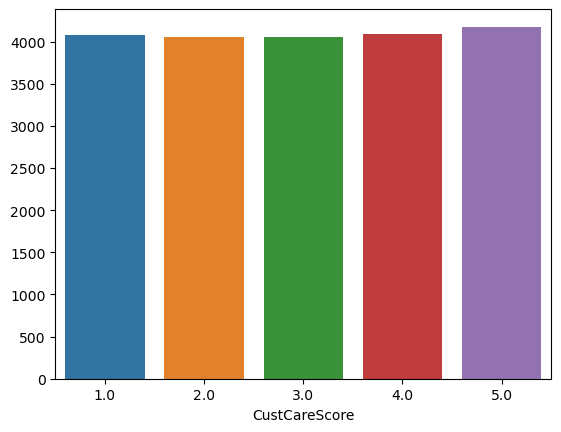

In [61]:
sns.barplot(x=results.index, y=results.values)

In [62]:
fig = px.scatter(data_frame = df, x='CustCareScore', y='AgentBonus'
           , title='Scatter Plot for AgentBonus Vs CustCareScore').update_traces(marker=dict(color='green'))

fig.update_layout(
    margin=dict(l=100, r=30, t=30, b=30)
)
fig.update_layout(title_x=0.5)

In [63]:
fig = px.scatter(data_frame = df, x='AgentBonus', y='CustCareScore'
           , title='Scatter Plot for AgentBonus Vs CustCareScore').update_traces(marker=dict(color='green'))

fig.update_layout(
    margin=dict(l=100, r=30, t=30, b=30)
)
fig.update_layout(title_x=0.5)

In [64]:
fig = px.scatter(data_frame = df, x='AgentBonus', y='CustTenure'
           , title='Scatter Plot for AgentBonus Vs CustTenure').update_traces(marker=dict(color='green'))

fig.update_layout(
    margin=dict(l=100, r=30, t=30, b=30)
)
fig.update_layout(title_x=0.5)

In [65]:
fig = px.scatter(data_frame = df, x='AgentBonus', y='Age'
           , title='Scatter Plot for AgentBonus Vs Age').update_traces(marker=dict(color='red'))

fig.update_layout(
    margin=dict(l=100, r=30, t=30, b=30)
)
fig.update_layout(title_x=0.5)


### Notes: With agents making big sum assured as insurance, they're making good bonus.

In [66]:
fig = px.scatter(x=df['AgentBonus'], y=df['Age']
           , title='Scatter Plot for AgentBonus Vs Age')

fig.update_layout(
    margin=dict(l=100, r=30, t=30, b=30)
)
fig.update_layout(title_x=0.5)

### Notes: With agents making big sum assured as insurance, they're making good bonus.

<Axes: xlabel='MaritalStatus', ylabel='AgentBonus'>

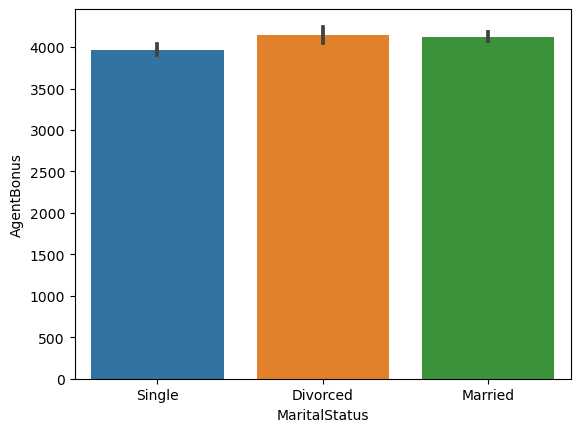

In [67]:
sns.barplot(x=df['MaritalStatus'], y=df['AgentBonus'])

In [68]:
# df.groupby(by='MaritalStatus').mean()['AgentBonus']
df[['MaritalStatus', 'AgentBonus']].groupby('MaritalStatus').agg('sum')

AgentBonus
MaritalStatus            
Divorced          3333274
Married           9349364
Single            5749191

<Axes: xlabel='AgentBonus', ylabel='SumAssured'>

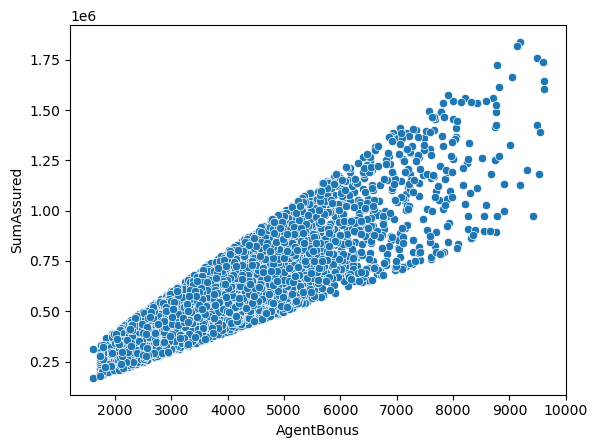

In [69]:
sns.scatterplot(x=df['AgentBonus'], y=df['SumAssured'])

In [70]:
df.select_dtypes(object).isnull().sum()

Channel             0
Occupation          0
EducationField      0
Gender              0
ExistingProdType    0
Designation         0
MaritalStatus       0
Complaint           0
Zone                0
PaymentMethod       0
dtype: int64

In [71]:
df.select_dtypes(np.number).isnull().sum()

AgentBonus                0
Age                     269
CustTenure              226
NumberOfPolicy           45
MonthlyIncome           236
ExistingPolicyTenure    184
SumAssured              154
LastMonthCalls            0
CustCareScore            52
dtype: int64

## Dummy Encoding

In [72]:
cat_cols_df = df.select_dtypes(object)
numerical_df = df.select_dtypes(np.number)

In [73]:
dummy_encoded = pd.get_dummies(cat_cols_df, drop_first=True, dtype=int)
dummy_encoded.head()

Channel_Online  Channel_Third Party Partner  Occupation_Large Business  \
0               0                            0                          0   
1               0                            1                          0   
2               0                            0                          0   
3               0                            1                          0   
4               0                            0                          0   

   Occupation_Salaried  Occupation_Small Business  EducationField_Engineer  \
0                    1                          0                        0   
1                    1                          0                        0   
2                    0                          0                        0   
3                    1                          0                        0   
4                    0                          1                        0   

   EducationField_Graduate  EducationField_MBA  EducationField_Post Graduate  \
0                        1                   0                             0   
1                        1                   0                             0   
2                        0                   0                             1   
3                        1                   0                             0   
4                        0                   0                             0   

   EducationField_Under Graduate  ...  Designation_VP  MaritalStatus_Married  \
0                              0  ...               0                      0   
1                              0  ...               0                      0   
2                              0  ...               0                      0   
3                              0  ...               0                      0   
4                              1  ...               0                      0   

   MaritalStatus_Single  Complaint_1  Zone_North  Zone_South  Zone_West  \
0                     1            1           1           0          0   
1                     0            0           1           0          0   
2                     1            1           1           0          0   
3                     0            1           0           0          1   
4                     0            0           0           0          1   

   PaymentMethod_Monthly  PaymentMethod_Quarterly  PaymentMethod_Yearly  
0                      0                        0                     0  
1                      0                        0                     1  
2                      0                        0                     1  
3                      0                        0                     0  
4                      0                        0                     0  

[5 rows x 29 columns]

In [74]:
dummy_encoded.shape

(4520, 29)

In [75]:
encoded_df = pd.concat([numerical_df, dummy_encoded], axis=1)
encoded_df.head()

AgentBonus   Age  CustTenure  NumberOfPolicy  MonthlyIncome  \
0        4409  22.0         4.0             2.0        20993.0   
1        2214  11.0         2.0             4.0        20130.0   
2        4273  26.0         4.0             3.0        17090.0   
3        1791  11.0         NaN             3.0        17909.0   
4        2955   6.0         NaN             4.0        18468.0   

   ExistingPolicyTenure  SumAssured  LastMonthCalls  CustCareScore  \
0                   2.0    806761.0               5            2.0   
1                   3.0    294502.0               7            3.0   
2                   2.0         NaN               0            3.0   
3                   2.0    268635.0               0            5.0   
4                   4.0    366405.0               2            5.0   

   Channel_Online  ...  Designation_VP  MaritalStatus_Married  \
0               0  ...               0                      0   
1               0  ...               0                      0   
2               0  ...               0                      0   
3               0  ...               0                      0   
4               0  ...               0                      0   

   MaritalStatus_Single  Complaint_1  Zone_North  Zone_South  Zone_West  \
0                     1            1           1           0          0   
1                     0            0           1           0          0   
2                     1            1           1           0          0   
3                     0            1           0           0          1   
4                     0            0           0           0          1   

   PaymentMethod_Monthly  PaymentMethod_Quarterly  PaymentMethod_Yearly  
0                      0                        0                     0  
1                      0                        0                     1  
2                      0                        0                     1  
3                      0                        0                     0  
4                      0                        0                     0  

[5 rows x 38 columns]

In [76]:
encoded_df.shape

(4520, 38)

## Null value imputer using KNN Imputer

In [77]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
df_imputed = pd.DataFrame(imputer.fit_transform(encoded_df), columns = encoded_df.columns)
df_imputed.head()

AgentBonus   Age  CustTenure  NumberOfPolicy  MonthlyIncome  \
0      4409.0  22.0         4.0             2.0        20993.0   
1      2214.0  11.0         2.0             4.0        20130.0   
2      4273.0  26.0         4.0             3.0        17090.0   
3      1791.0  11.0         5.9             3.0        17909.0   
4      2955.0   6.0         9.3             4.0        18468.0   

   ExistingPolicyTenure  SumAssured  LastMonthCalls  CustCareScore  \
0                   2.0    806761.0             5.0            2.0   
1                   3.0    294502.0             7.0            3.0   
2                   2.0    708009.3             0.0            3.0   
3                   2.0    268635.0             0.0            5.0   
4                   4.0    366405.0             2.0            5.0   

   Channel_Online  ...  Designation_VP  MaritalStatus_Married  \
0             0.0  ...             0.0                    0.0   
1             0.0  ...             0.0                    0.0   
2             0.0  ...             0.0                    0.0   
3             0.0  ...             0.0                    0.0   
4             0.0  ...             0.0                    0.0   

   MaritalStatus_Single  Complaint_1  Zone_North  Zone_South  Zone_West  \
0                   1.0          1.0         1.0         0.0        0.0   
1                   0.0          0.0         1.0         0.0        0.0   
2                   1.0          1.0         1.0         0.0        0.0   
3                   0.0          1.0         0.0         0.0        1.0   
4                   0.0          0.0         0.0         0.0        1.0   

   PaymentMethod_Monthly  PaymentMethod_Quarterly  PaymentMethod_Yearly  
0                    0.0                      0.0                   0.0  
1                    0.0                      0.0                   1.0  
2                    0.0                      0.0                   1.0  
3                    0.0                      0.0                   0.0  
4                    0.0                      0.0                   0.0  

[5 rows x 38 columns]

In [78]:
df_imputed.isnull().sum()

AgentBonus                       0
Age                              0
CustTenure                       0
NumberOfPolicy                   0
MonthlyIncome                    0
ExistingPolicyTenure             0
SumAssured                       0
LastMonthCalls                   0
CustCareScore                    0
Channel_Online                   0
Channel_Third Party Partner      0
Occupation_Large Business        0
Occupation_Salaried              0
Occupation_Small Business        0
EducationField_Engineer          0
EducationField_Graduate          0
EducationField_MBA               0
EducationField_Post Graduate     0
EducationField_Under Graduate    0
Gender_Male                      0
ExistingProdType_2               0
ExistingProdType_3               0
ExistingProdType_4               0
ExistingProdType_5               0
ExistingProdType_6               0
Designation_Executive            0
Designation_Manager              0
Designation_Senior Manager       0
Designation_VP      

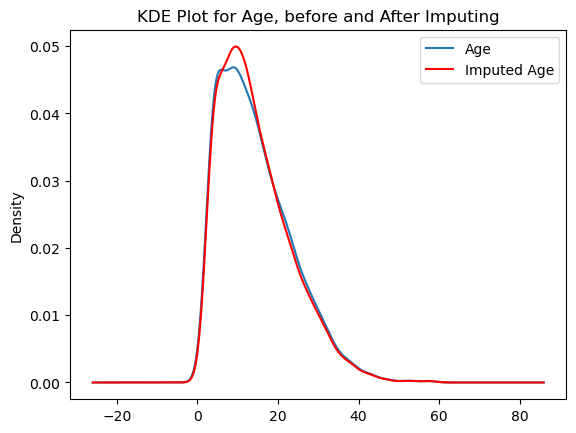

In [79]:
# To check if our imputation didn't change the variation too much

fig = plt.figure()
ax = fig.add_subplot(111)

df['Age'].plot(kind='kde', ax=ax)
df_imputed['Age'].plot(kind='kde', ax=ax, color='red', label='Imputed Age')
plt.title('KDE Plot for Age, before and After Imputing')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

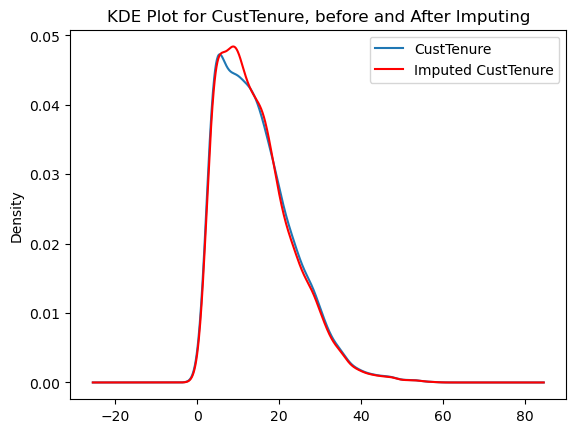

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['CustTenure'].plot(kind='kde', ax=ax)
df_imputed['CustTenure'].plot(kind='kde', ax=ax, color='red', label='Imputed CustTenure')
plt.title('KDE Plot for CustTenure, before and After Imputing')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

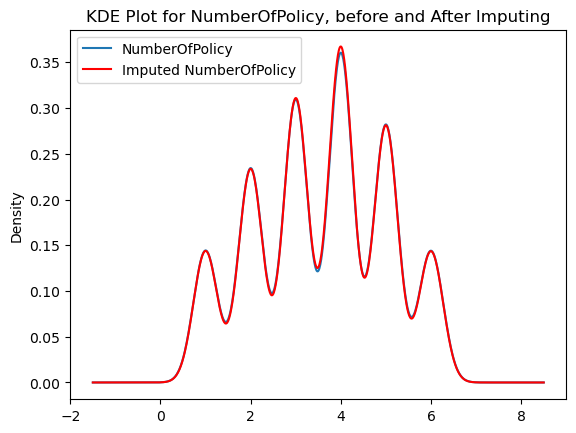

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['NumberOfPolicy'].plot(kind='kde', ax=ax)
df_imputed['NumberOfPolicy'].plot(kind='kde', ax=ax, color='red', label='Imputed NumberOfPolicy')
plt.title('KDE Plot for NumberOfPolicy, before and After Imputing')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

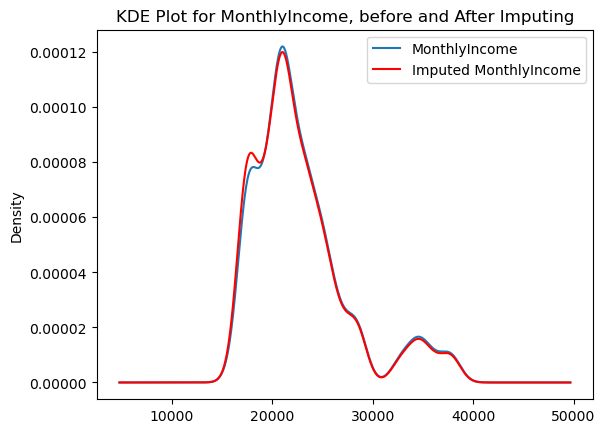

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['MonthlyIncome'].plot(kind='kde', ax=ax)
df_imputed['MonthlyIncome'].plot(kind='kde', ax=ax, color='red', label='Imputed MonthlyIncome')
plt.title('KDE Plot for MonthlyIncome, before and After Imputing')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

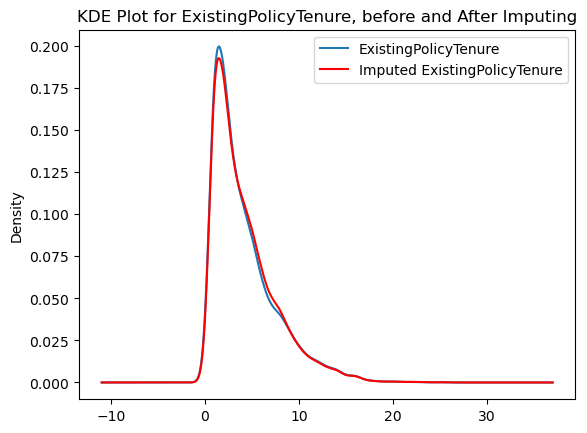

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['ExistingPolicyTenure'].plot(kind='kde', ax=ax)
df_imputed['ExistingPolicyTenure'].plot(kind='kde', ax=ax, color='red', label='Imputed ExistingPolicyTenure')
plt.title('KDE Plot for ExistingPolicyTenure, before and After Imputing')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

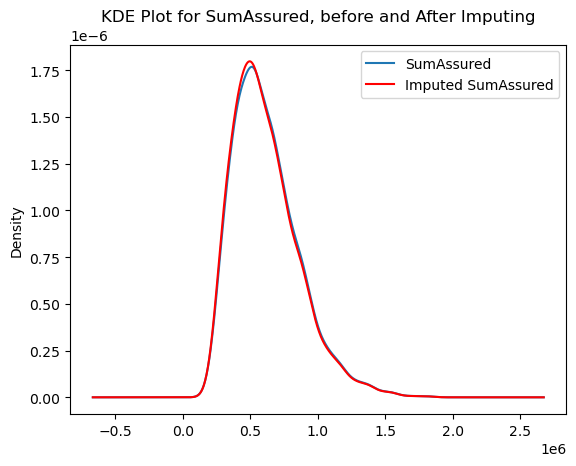

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['SumAssured'].plot(kind='kde', ax=ax)
df_imputed['SumAssured'].plot(kind='kde', ax=ax, color='red', label='Imputed SumAssured')
plt.title('KDE Plot for SumAssured, before and After Imputing')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

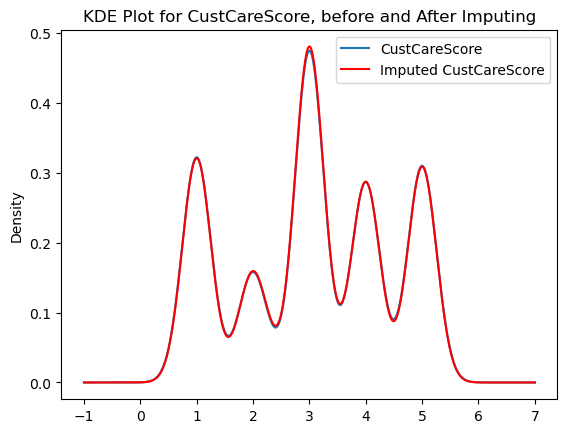

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['CustCareScore'].plot(kind='kde', ax=ax)
df_imputed['CustCareScore'].plot(kind='kde', ax=ax, color='red', label='Imputed CustCareScore')
plt.title('KDE Plot for CustCareScore, before and After Imputing')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [86]:
## From all of these above graphs, we can observe, our imputation didn't change the variance of our columns, so, we can safely replace imputed columns with original columns

### Feature Engineering

In [87]:
import plotly.express as px

z = df.select_dtypes(np.number).corr()

fig = px.imshow(z, text_auto=True)
fig.update_layout(
    margin=dict(l=100, r=30, t=30, b=30)
)
fig.show()

In [88]:
df_imputed.shape

(4520, 38)

In [89]:
#To check the level of multicollinearity in the data

from statsmodels.stats.outliers_influence import variance_inflation_factor
# consider the independent variables
X = df_imputed.drop('AgentBonus',axis=1)

# create an empty dataframe
vif = pd.DataFrame()

# calculate VIF using list comprehension 
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# create a column of variable names
vif["Features"] = X.columns

# print the VIF
vif.sort_values('VIF_Factor', ascending=False)

VIF_Factor                       Features
11  163.930260            Occupation_Salaried
12  133.315287      Occupation_Small Business
3    84.141462                  MonthlyIncome
21   64.456405             ExistingProdType_4
10   49.213455      Occupation_Large Business
20   44.020437             ExistingProdType_3
33   40.595800                      Zone_West
14   31.929130        EducationField_Graduate
31   30.061888                     Zone_North
22   26.056943             ExistingProdType_5
13   20.799856        EducationField_Engineer
5    13.375604                     SumAssured
24   10.474040          Designation_Executive
34   10.392965          PaymentMethod_Monthly
2     7.875198                 NumberOfPolicy
25    7.792710            Designation_Manager
7     6.081772                  CustCareScore
23    5.367429             ExistingProdType_6
16    5.270133   EducationField_Post Graduate
1     4.973089                     CustTenure
0     4.972143                            Age
17    3.996238  EducationField_Under Graduate
28    3.894539          MaritalStatus_Married
36    3.630598           PaymentMethod_Yearly
26    3.259510     Designation_Senior Manager
6     3.179592                 LastMonthCalls
4     3.035123           ExistingPolicyTenure
29    2.869779           MaritalStatus_Single
18    2.535464                    Gender_Male
19    2.417595             ExistingProdType_2
15    2.287528             EducationField_MBA
27    2.198757                 Designation_VP
35    1.571193        PaymentMethod_Quarterly
30    1.414689                    Complaint_1
9     1.285008    Channel_Third Party Partner
8     1.169008                 Channel_Online
32    1.097732                     Zone_South

In [90]:
#To check the level of multicollinearity in the data

from statsmodels.stats.outliers_influence import variance_inflation_factor
# consider the independent variables
X = df_imputed.drop(['AgentBonus','Occupation_Salaried'],axis=1)

# create an empty dataframe
vif = pd.DataFrame()

# calculate VIF using list comprehension 
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# create a column of variable names
vif["Features"] = X.columns

# print the VIF
vif.sort_values('VIF_Factor', ascending=False)

VIF_Factor                       Features
3    67.481091                  MonthlyIncome
20   52.649432             ExistingProdType_4
32   34.270172                      Zone_West
19   33.591525             ExistingProdType_3
13   28.381879        EducationField_Graduate
11   26.666373      Occupation_Small Business
30   25.452205                     Zone_North
21   22.564173             ExistingProdType_5
12   19.975434        EducationField_Engineer
10   18.550362      Occupation_Large Business
5    13.336684                     SumAssured
23    8.830428          Designation_Executive
33    8.409882          PaymentMethod_Monthly
2     7.841136                 NumberOfPolicy
24    6.722510            Designation_Manager
7     6.013419                  CustCareScore
0     4.972036                            Age
1     4.968273                     CustTenure
15    4.813918   EducationField_Post Graduate
22    4.808837             ExistingProdType_6
16    3.914788  EducationField_Under Graduate
27    3.853457          MaritalStatus_Married
35    3.488779           PaymentMethod_Yearly
6     3.170270                 LastMonthCalls
25    3.063649     Designation_Senior Manager
4     3.031068           ExistingPolicyTenure
28    2.851160           MaritalStatus_Single
17    2.535222                    Gender_Male
18    2.359511             ExistingProdType_2
26    2.150760                 Designation_VP
14    2.143811             EducationField_MBA
34    1.494627        PaymentMethod_Quarterly
29    1.414559                    Complaint_1
9     1.282291    Channel_Third Party Partner
8     1.168198                 Channel_Online
31    1.082923                     Zone_South

In [91]:
#To check the level of multicollinearity in the data

from statsmodels.stats.outliers_influence import variance_inflation_factor
# consider the independent variables
X = df_imputed.drop(['AgentBonus','Occupation_Salaried', 'ExistingProdType_4'],axis=1)

# create an empty dataframe
vif = pd.DataFrame()

# calculate VIF using list comprehension 
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# create a column of variable names
vif["Features"] = X.columns

# print the VIF
vif.sort_values('VIF_Factor', ascending=False)

VIF_Factor                       Features
3    53.331775                  MonthlyIncome
31   32.288471                      Zone_West
13   24.718130        EducationField_Graduate
29   24.075802                     Zone_North
11   23.446419      Occupation_Small Business
12   19.948540        EducationField_Engineer
10   18.012373      Occupation_Large Business
5    13.326078                     SumAssured
22    7.745906          Designation_Executive
2     7.660877                 NumberOfPolicy
23    6.096950            Designation_Manager
7     6.003916                  CustCareScore
0     4.968173                            Age
1     4.961150                     CustTenure
15    4.283987   EducationField_Post Graduate
16    3.885047  EducationField_Under Graduate
26    3.846138          MaritalStatus_Married
34    3.372918           PaymentMethod_Yearly
6     3.163655                 LastMonthCalls
4     3.028710           ExistingPolicyTenure
24    2.968983     Designation_Senior Manager
27    2.844086           MaritalStatus_Single
17    2.535177                    Gender_Male
20    2.168180             ExistingProdType_5
19    2.154938             ExistingProdType_3
25    2.090496                 Designation_VP
32    2.008997          PaymentMethod_Monthly
14    1.997673             EducationField_MBA
18    1.948312             ExistingProdType_2
28    1.414063                    Complaint_1
9     1.280948    Channel_Third Party Partner
21    1.216054             ExistingProdType_6
33    1.210255        PaymentMethod_Quarterly
8     1.167261                 Channel_Online
30    1.077881                     Zone_South

In [92]:
#To check the level of multicollinearity in the data

from statsmodels.stats.outliers_influence import variance_inflation_factor
# consider the independent variables
X = df_imputed.drop(['AgentBonus','Occupation_Salaried', 'ExistingProdType_4', 'MonthlyIncome'],axis=1)

# create an empty dataframe
vif = pd.DataFrame()

# calculate VIF using list comprehension 
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# create a column of variable names
vif["Features"] = X.columns

# print the VIF
vif.sort_values('VIF_Factor', ascending=False)

VIF_Factor                       Features
30   27.843125                      Zone_West
28   20.809656                     Zone_North
12   20.199381        EducationField_Graduate
10   19.580088      Occupation_Small Business
11   19.531056        EducationField_Engineer
9    17.894598      Occupation_Large Business
4    12.980141                     SumAssured
2     7.405049                 NumberOfPolicy
21    6.732719          Designation_Executive
6     5.919879                  CustCareScore
22    5.844584            Designation_Manager
0     4.946273                            Age
1     4.941611                     CustTenure
15    3.826724  EducationField_Under Graduate
25    3.808490          MaritalStatus_Married
14    3.674507   EducationField_Post Graduate
33    3.301620           PaymentMethod_Yearly
5     3.134112                 LastMonthCalls
3     3.022107           ExistingPolicyTenure
23    2.962547     Designation_Senior Manager
26    2.819897           MaritalStatus_Single
16    2.525126                    Gender_Male
19    2.131613             ExistingProdType_5
18    2.068775             ExistingProdType_3
31    1.990890          PaymentMethod_Monthly
17    1.939687             ExistingProdType_2
13    1.788640             EducationField_MBA
24    1.708080                 Designation_VP
27    1.412098                    Complaint_1
8     1.280565    Channel_Third Party Partner
32    1.209896        PaymentMethod_Quarterly
20    1.206814             ExistingProdType_6
7     1.167251                 Channel_Online
29    1.069475                     Zone_South

In [93]:
#To check the level of multicollinearity in the data

from statsmodels.stats.outliers_influence import variance_inflation_factor
# consider the independent variables
X = df_imputed.drop(['AgentBonus','Occupation_Salaried', 'ExistingProdType_4', 'MonthlyIncome', 'Zone_West'],axis=1)

# create an empty dataframe
vif = pd.DataFrame()

# calculate VIF using list comprehension 
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# create a column of variable names
vif["Features"] = X.columns

# print the VIF
vif.sort_values('VIF_Factor', ascending=False)

VIF_Factor                       Features
11   18.956921        EducationField_Engineer
9    17.787743      Occupation_Large Business
10   14.920354      Occupation_Small Business
12   14.763685        EducationField_Graduate
4    12.698286                     SumAssured
2     7.220975                 NumberOfPolicy
21    6.215802          Designation_Executive
6     5.802660                  CustCareScore
22    5.446209            Designation_Manager
0     4.940793                            Age
1     4.932794                     CustTenure
15    3.775562  EducationField_Under Graduate
25    3.766094          MaritalStatus_Married
32    3.252697           PaymentMethod_Yearly
5     3.085495                 LastMonthCalls
3     3.019230           ExistingPolicyTenure
14    2.963984   EducationField_Post Graduate
23    2.843791     Designation_Senior Manager
26    2.796917           MaritalStatus_Single
16    2.511205                    Gender_Male
19    2.127697             ExistingProdType_5
18    2.031048             ExistingProdType_3
30    1.982410          PaymentMethod_Monthly
17    1.939670             ExistingProdType_2
28    1.735911                     Zone_North
24    1.685996                 Designation_VP
13    1.578530             EducationField_MBA
27    1.405615                    Complaint_1
8     1.280482    Channel_Third Party Partner
31    1.209141        PaymentMethod_Quarterly
20    1.206277             ExistingProdType_6
7     1.167236                 Channel_Online
29    1.007370                     Zone_South

In [94]:
#To check the level of multicollinearity in the data

from statsmodels.stats.outliers_influence import variance_inflation_factor
# consider the independent variables
X = df_imputed.drop(['AgentBonus','Occupation_Salaried', 'ExistingProdType_4', 'MonthlyIncome'\
                     , 'Zone_West', 'EducationField_Engineer'],axis=1)

# create an empty dataframe
vif = pd.DataFrame()

# calculate VIF using list comprehension 
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# create a column of variable names
vif["Features"] = X.columns

# print the VIF
vif.sort_values('VIF_Factor', ascending=False)

VIF_Factor                       Features
10   14.271328      Occupation_Small Business
11   13.593406        EducationField_Graduate
4    12.633058                     SumAssured
2     7.140725                 NumberOfPolicy
20    6.061645          Designation_Executive
6     5.770810                  CustCareScore
21    5.354646            Designation_Manager
0     4.939119                            Age
1     4.930081                     CustTenure
9     3.803770      Occupation_Large Business
24    3.754209          MaritalStatus_Married
14    3.714434  EducationField_Under Graduate
31    3.233432           PaymentMethod_Yearly
5     3.079451                 LastMonthCalls
3     3.019192           ExistingPolicyTenure
22    2.818975     Designation_Senior Manager
13    2.812690   EducationField_Post Graduate
25    2.783304           MaritalStatus_Single
15    2.510201                    Gender_Male
18    2.124518             ExistingProdType_5
17    2.019501             ExistingProdType_3
29    1.981920          PaymentMethod_Monthly
16    1.938759             ExistingProdType_2
27    1.733307                     Zone_North
23    1.681507                 Designation_VP
12    1.535102             EducationField_MBA
26    1.405559                    Complaint_1
8     1.280482    Channel_Third Party Partner
30    1.209140        PaymentMethod_Quarterly
19    1.205367             ExistingProdType_6
7     1.167001                 Channel_Online
28    1.007370                     Zone_South

### We removed five highly correlated columns out of 38 columns, we're able to drop multi-collinearity from 163 to < 15

In [95]:
df_imputed.drop(['Occupation_Salaried', 'ExistingProdType_4', 'MonthlyIncome'\
                 , 'Zone_West', 'EducationField_Engineer'], axis=1, inplace=True)

In [96]:
df_imputed.shape

(4520, 33)

In [97]:
## Feature Importance 


X = df_imputed.drop('AgentBonus', axis=1)  #independent columns
y = df_imputed['AgentBonus']    #target column i.e price range

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)

# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

ExtraTreesClassifier()

In [98]:
important_fetures= pd.Series(model.feature_importances_, index= X.columns,)

In [99]:
top_cols_FE = important_fetures.sort_values(ascending=False).head(25)
top_cols_FE

SumAssured                       0.104813
Age                              0.099273
CustTenure                       0.098332
ExistingPolicyTenure             0.089054
LastMonthCalls                   0.083745
NumberOfPolicy                   0.077928
CustCareScore                    0.069998
Zone_North                       0.034748
MaritalStatus_Married            0.031525
Gender_Male                      0.029550
ExistingProdType_3               0.026428
Complaint_1                      0.025754
PaymentMethod_Yearly             0.020329
MaritalStatus_Single             0.020070
Channel_Third Party Partner      0.017721
ExistingProdType_5               0.017307
Occupation_Small Business        0.015822
Channel_Online                   0.015702
EducationField_Under Graduate    0.015500
EducationField_Graduate          0.015014
Designation_Manager              0.014072
Designation_Executive            0.013489
PaymentMethod_Monthly            0.011974
Occupation_Large Business        0

<Axes: >

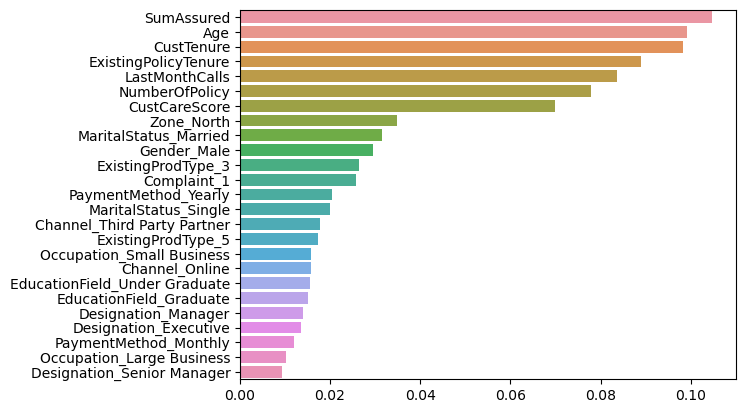

In [100]:
sns.barplot(x=top_cols_FE.values, y=top_cols_FE.index)

In [101]:
list(top_cols_FE.index)

['SumAssured',
 'Age',
 'CustTenure',
 'ExistingPolicyTenure',
 'LastMonthCalls',
 'NumberOfPolicy',
 'CustCareScore',
 'Zone_North',
 'MaritalStatus_Married',
 'Gender_Male',
 'ExistingProdType_3',
 'Complaint_1',
 'PaymentMethod_Yearly',
 'MaritalStatus_Single',
 'Channel_Third Party Partner',
 'ExistingProdType_5',
 'Occupation_Small Business',
 'Channel_Online',
 'EducationField_Under Graduate',
 'EducationField_Graduate',
 'Designation_Manager',
 'Designation_Executive',
 'PaymentMethod_Monthly',
 'Occupation_Large Business',
 'Designation_Senior Manager']

## Model Building 

### Without Feature importance

In [102]:
# type your code here

from sklearn.model_selection import train_test_split

x = df_imputed.drop(columns = 'AgentBonus', axis=1)
y = df_imputed['AgentBonus']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=10)

In [103]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train_scaled = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

In [104]:
# mean and std of train. Which helps us to understand
# whether the train and test are some same population

In [105]:
import statsmodels.api as sm

x_train_scaled_cons = sm.add_constant(x_train_scaled)
lr_ols = sm.OLS(y_train,x_train_scaled_cons.values).fit()
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     501.0
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:22:09   Log-Likelihood:                -28258.
No. Observations:                3616   AIC:                         5.658e+04
Df Residuals:                    3583   BIC:                         5.679e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4099.1059     10.011    409.450      0.000    4079.478    4118.734
x1           206.6461     11.790     17.527      0.000     183.531     229.762
x2           206.8361     11.759     17.589      0.000     183.781     229.891
x3            -2.1003     10.523     -0.200      0.842     -22.732      18.532
x4           113.8105     10.833     10.506      0.000      92.571     135.050
x5           839.4059     13.643     61.526      0.000     812.657     866.155
x6            -3.5878     11.021     -0.326      0.745     -25.196      18.021
x7            11.5451     10.118      1.141      0.254      -8.293      31.383
x8            -1.4997     10.239     -0.146      0.884     -21.574      18.574
x9             0.5557     10.202      0.054      0.957     -19.446      20.558
x10          -13.8603     24.097     -0.575      0.565     -61.105      33.384
x11          -25.3455     38.325     -0.661      0.508    -100.486      49.795
x12          -25.0580     39.308     -0.637      0.524    -102.126      52.010
x13          -13.8172     14.380     -0.961      0.337     -42.011      14.376
x14          -17.0065     20.917     -0.813      0.416     -58.016      24.003
x15           -4.1338     16.222     -0.255      0.799     -35.940      27.672
x16            3.1263     10.153      0.308      0.758     -16.780      23.033
x17           21.7676     13.595      1.601      0.109      -4.887      48.422
x18          -61.0990     12.251     -4.987      0.000     -85.120     -37.078
x19           52.2564     13.562      3.853      0.000      25.667      78.846
x20           14.2991     10.871      1.315      0.188      -7.015      35.613
x21         -319.7145     21.296    -15.013      0.000    -361.467    -277.962
x22         -278.1476     20.076    -13.855      0.000    -317.510    -238.785
x23         -115.3997     16.020     -7.203      0.000    -146.810     -83.990
x24           35.2009     12.720      2.767      0.006      10.262      60.140
x25          -14.8265     13.920     -1.065      0.287     -42.119      12.466
x26           14.6633     13.972      1.049      0.294     -12.730      42.057
x27           18.7438     10.063      1.863      0.063      -0.986      38.473
x28           -2.7823     10.107     -0.275      0.783     -22.599      17.034
x29            0.3425     10.034      0.034      0.973     -19.330      20.015
x30          -10.0163     13.624     -0.735      0.462     -36.728      16.695
x31            8.1464     10.841      0.751      0.452     -13.109      29.402
x32          -62.1521     15.265     -4.072      0.000     -92.080     -32.224
==============================================================================
Omnibus:                      251.044   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.810
Sk

### With Feature importance

In [106]:
# type your code here

from sklearn.model_selection import train_test_split

x = df_imputed[list(top_cols_FE.index)]
y = df_imputed['AgentBonus']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=10)

In [107]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train_scaled = pd.DataFrame(ss.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(x_test), columns=x_test.columns)

In [108]:
# mean and std of train. Which helps us to understand
# whether the train and test are some same population

In [413]:
import statsmodels.api as sm

x_train_cons = sm.add_constant(x_train)
lr_ols = sm.OLS(y_train,x_train_cons).fit()
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             AgentBonus   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     619.9
Date:                Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:46:45   Log-Likelihood:                -28310.
No. Observations:                3616   AIC:                         5.667e+04
Df Residuals:                    3590   BIC:                         5.683e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1420.1614     76.612     18.537      0.000    1269.954    1570.368
SumAssured                        0.0035    5.6e-05     62.425      0.000       0.003       0.004
Age                              24.2794      1.342     18.097      0.000      21.649      26.910
CustTenure                       24.2619      1.338     18.138      0.000      21.639      26.884
ExistingPolicyTenure             34.8750      3.293     10.590      0.000      28.419      41.331
LastMonthCalls                    1.5219      3.049      0.499      0.618      -4.456       7.500
NumberOfPolicy                   -1.6803      7.352     -0.229      0.819     -16.094      12.734
CustCareScore                    10.4999      7.462      1.407      0.159      -4.130      25.130
Zone_North                      -12.9508     20.738     -0.625      0.532     -53.609      27.708
MaritalStatus_Married           -35.8225     28.108     -1.274      0.203     -90.932      19.287
Gender_Male                      11.9294     20.816      0.573      0.567     -28.883      52.741
Complaint_1                      39.6262     22.449      1.765      0.078      -4.387      83.639
ExistingProdType_3             -120.5818     26.960     -4.473      0.000    -173.441     -67.723
PaymentMethod_Yearly           -116.8253     31.350     -3.727      0.000    -178.290     -55.360
MaritalStatus_Single             24.6388     30.212      0.816      0.415     -34.596      83.874
ExistingProdType_5              120.5375     35.928      3.355      0.001      50.096     190.979
EducationField_Under Graduate     4.1390     34.385      0.120      0.904     -63.277      71.555
Occupation_Small Business        10.1437     42.493      0.239      0.811     -73.170      93.457
Channel_Third Party Partner      -5.2590     26.127     -0.201      0.840     -56.483      45.966
Channel_Online                   -8.4755     34.954     -0.242      0.808     -77.007      60.057
EducationField_Graduate          19.3023     36.958      0.522      0.602     -53.159      91.763
Designation_Manager            -407.5670     27.831    -14.645      0.000    -462.132    -353.002
Designation_Executive          -477.7942     30.605    -15.611      0.000    -537.800    -417.788
PaymentMethod_Monthly           -40.2340     48.842     -0.824      0.410    -135.995      55.527
Occupation_Large Business         4.0290     47.561      0.085      0.932     -89.220      97.278
ExistingProdType_2              116.3551     59.308      1.962      0.050       0.074     232.637
==============================================================================
Omnibus:                      311.779   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              423.225
Skew

## Model

In [414]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


x = df_imputed.drop(columns = 'AgentBonus', axis=1)
y = df_imputed['AgentBonus']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

ss = StandardScaler()
x_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

In [415]:
# type your code here

from sklearn.linear_model import LinearRegression

In [416]:
LR = LinearRegression()

In [417]:
LR.fit(x_train_scaled, y_train)

LinearRegression()

In [418]:
y_train_pred = LR.predict(x_train_scaled)
y_test_pred = LR.predict(x_test_scaled)

In [419]:
print('R2 Train :', LR.score(x_train_scaled, y_train))
print('R2 Train :', LR.score(x_test_scaled, y_test))

R2 Train : 0.8233114510433932
R2 Train : 0.8050812622091886


In [420]:
from sklearn.metrics import mean_squared_error

print('RMSE Train :', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE Test :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE Train : 587.6658143850805
RMSE Test : 624.0292695715195


In [426]:
y_pred = LR.predict(x_test_scaled)

residual = (y_test - y_pred)

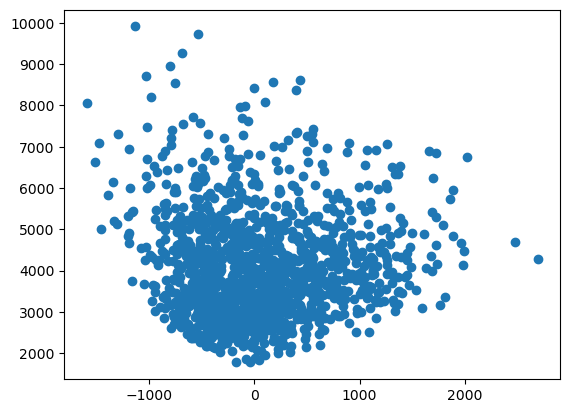

In [427]:
import matplotlib.pyplot as plt

plt.scatter(residual,y_pred)

plt.show()

In [130]:
# Here, train score is higer than the test score, the model is over fit

In [431]:
from sklearn.model_selection import KFold,cross_val_score

kf=KFold(n_splits=3,shuffle=True,random_state=0)

cv_scores = cross_val_score(LR,x_train_scaled,y_train, scoring='r2', cv=5)
print(np.mean(cv_scores))

mse_mean = -np.mean(cv_scores)
mse_std = np.std(cv_scores)

print('Bias_error:', -np.mean(cv_scores))
print('Var_error:', np.std(cv_scores))

0.8170011839965177
Bias_error: -0.8170011839965177
Var_error: 0.01533691940398834


In [33]:
# The bias error is large, therefore the model is overfit

### SGD Regressor 

In [308]:
# type your code here

from sklearn.linear_model import SGDRegressor


SGD=SGDRegressor(l1_ratio=0,learning_rate='adaptive')

kf=KFold(n_splits=3,shuffle=True,random_state=0)
scores=cross_val_score(SGD,x_train_scaled,y_train,cv=kf,scoring='neg_root_mean_squared_error')

print('Bias_error:',-np.mean(np.abs(scores)))
print('Var_error:',np.std(np.abs(scores),ddof=1))

Bias_error: -147222310.5563194
Var_error: 70744740.98683059


In [148]:
# type your code here

# Backward elemination

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [149]:
back_ele = sfs(LR,k_features='best',forward=False,cv=5,scoring='r2')
back_ele.fit(x_train_scaled,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 37), scoring='r2')

In [150]:
list(back_ele.k_feature_names_)

['Age',
 'CustTenure',
 'MonthlyIncome',
 'ExistingPolicyTenure',
 'SumAssured',
 'LastMonthCalls',
 'CustCareScore',
 'ExistingProdType_3',
 'ExistingProdType_5',
 'Designation_Executive',
 'Designation_Manager',
 'Designation_Senior Manager',
 'Complaint_1',
 'PaymentMethod_Yearly']

In [38]:
# Forward Selection

In [151]:
for_slc = sfs(LR,k_features='best',forward=True,cv=5,scoring='r2')
for_slc.fit(x_train_scaled,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 37),
                          scoring='r2')

In [152]:
list(for_slc.k_feature_names_)

['Age',
 'CustTenure',
 'NumberOfPolicy',
 'MonthlyIncome',
 'ExistingPolicyTenure',
 'SumAssured',
 'LastMonthCalls',
 'CustCareScore',
 'EducationField_Graduate',
 'ExistingProdType_2',
 'ExistingProdType_3',
 'ExistingProdType_5',
 'Designation_Executive',
 'Designation_Manager',
 'Designation_Senior Manager',
 'Complaint_1',
 'PaymentMethod_Yearly']

## Decision Tree Regressor

In [117]:
x = df_imputed.drop(columns = 'AgentBonus', axis=1)
y = df_imputed['AgentBonus']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

ss = StandardScaler()
x_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
x_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)

In [118]:
from sklearn.tree import DecisionTreeRegressor

dtR = DecisionTreeRegressor(random_state=0)

dtR.fit(x_train_scaled, x_train_scaled)

DecisionTreeRegressor(random_state=0)

In [123]:
y_train.shape

(3164,)

In [124]:
x_train_scaled.shape

(3164, 32)

In [162]:
dtR.score(X_train_scaled, y_train_scaled)

1.0

In [163]:
dtR.score(X_test_scaled, y_test_scaled)

0.9921758493024103

In [ ]:
dtR.score(x_train_scaled)

In [163]:
dtR.score(X_test_scaled, y_test_scaled)

0.9921758493024103

In [164]:
dtRmse = mean_squared_error(y_train_scaled,(dtR.predict(X_train_scaled)),squared=False)
dtRmse

3.418634095802663e-18

In [165]:
dtRrmse = mean_squared_error(y_test_scaled,(dtR.predict(X_test_scaled)),squared=False)
dtRrmse

0.08845422939345357

In [166]:
mae = mean_absolute_error(y_train_scaled,(dtR.predict(X_train_scaled)))
mae

1.0526766984435744e-19

In [167]:
mae = mean_absolute_error(y_test_scaled,(dtR.predict(X_test_scaled)))
mae

0.06181451947848977

In [168]:
## Pruning Decision tree

param_grid = {
    
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [50,100,150,300,450],
}

dtcl = DecisionTreeRegressor(random_state=1)

In [169]:
grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [170]:
grid_search.fit(X_train_scaled, y_train_scaled)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}


DecisionTreeRegressor(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                      random_state=1)

In [171]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Tree_File = open('tree4.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file=Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Tree_File.close()

In [172]:
best_grid.score(X_train_scaled, y_train_scaled)

0.9675233854544184

In [173]:
best_grid.score(X_test_scaled, y_test_scaled)

0.9611788921329564

In [174]:
dtRmse = mean_squared_error(y_train_scaled,(best_grid.predict(X_train_scaled)),squared=False)
dtRmse

0.18021269252075903

In [175]:
dtRrmse = mean_squared_error(y_test_scaled,(best_grid.predict(X_test_scaled)),squared=False)
dtRrmse

0.19703072823050638